In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product e.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product E,Anti Biotic Respiratory,January,2019,57650,303130,2978499,1
2019-02-01,Product E,Anti Biotic Respiratory,February,2019,66035,347219,3411712,2
2019-03-01,Product E,Anti Biotic Respiratory,March,2019,88208,463807,4557285,3
2019-04-01,Product E,Anti Biotic Respiratory,April,2019,74712,392844,3860011,4
2019-05-01,Product E,Anti Biotic Respiratory,May,2019,61172,321649,3160464,5
2019-06-01,Product E,Anti Biotic Respiratory,June,2019,48721,256180,2517181,6
2019-07-01,Product E,Anti Biotic Respiratory,July,2019,51556,271087,2663652,7
2019-08-01,Product E,Anti Biotic Respiratory,August,2019,70726,371885,3654074,8
2019-09-01,Product E,Anti Biotic Respiratory,September,2019,70502,370707,3642501,9


In [4]:
sales_e= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_e.shape

(60, 3)

In [6]:
sales_e.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_e['Sales'].sum())
print('Total Market Size:',sales_e['Market Size'].sum())
print('Total Marketing Expense:', sales_e['Marketing Expense'].sum())

Total Sales: 4925930
Total Market Size: 22616686
Total Marketing Expense: 97983937


Text(0.5, 1.0, 'Product E')

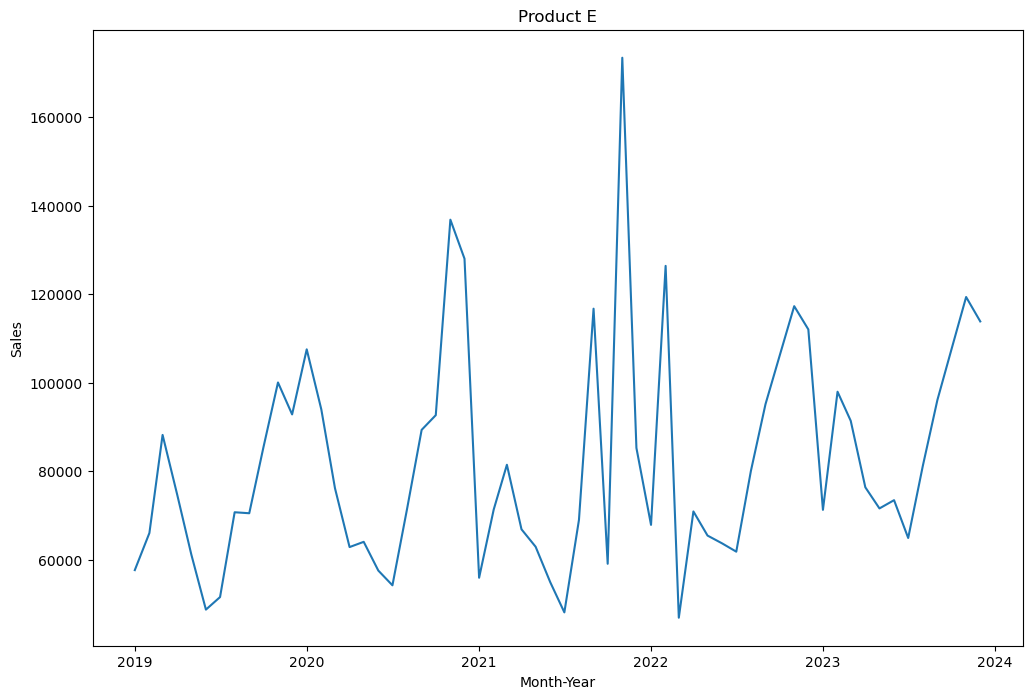

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_e['Sales'])
plt.title('Product E')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_e['Sales'])

ADF Statistics: -1.547517694729824
p- value: 0.5098879012430942
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
sales_e_diff= sales_e['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product E - First Difference')

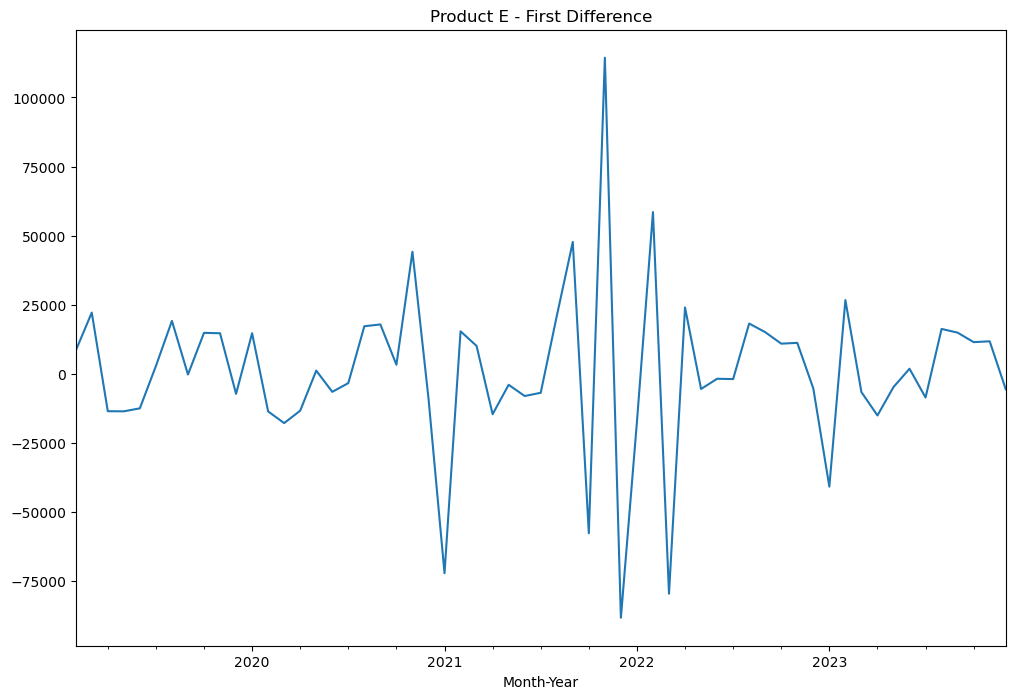

In [13]:
sales_e_diff.plot(figsize=(12,8))
plt.title('Product E - First Difference')

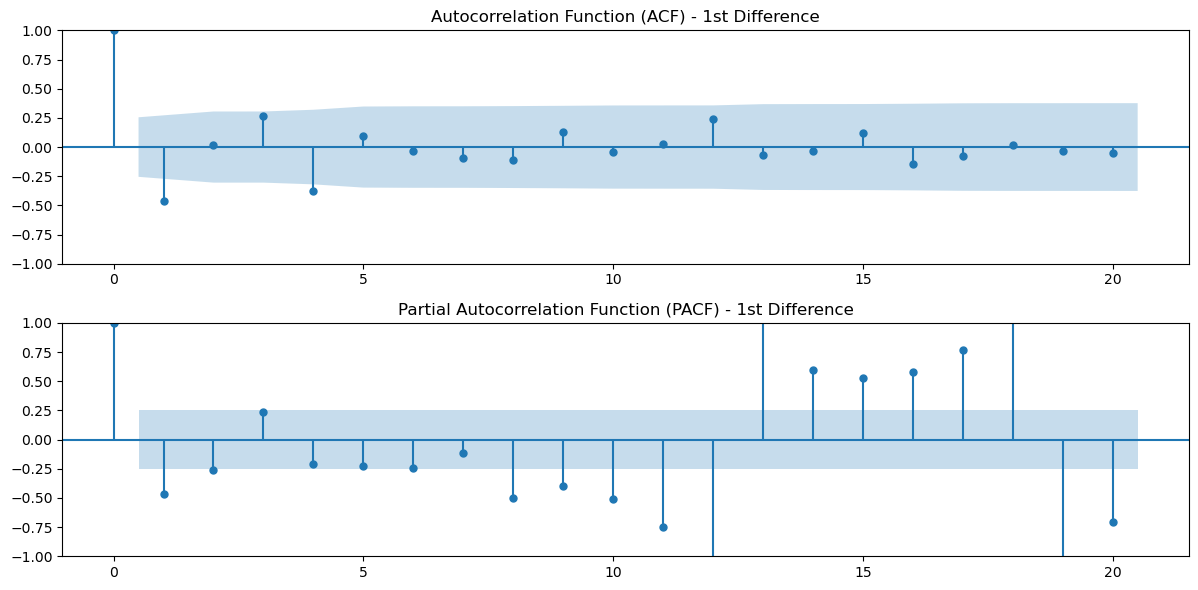

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_e_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_e_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [15]:
adf_test(sales_e_diff)

ADF Statistics: -6.125883961889508
p- value: 8.631648926998655e-08
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
train= sales_e[:54]
test=sales_e[54:]

In [17]:
print(len(train),len(test))

54 6


In [18]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [19]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [20]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [21]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_e)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [22]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse          rmse
4   1  1  1221.626292  1231.477751  10039.659504  1.526319e+08  12354.428461
7   2  1  1221.667104  1233.488855   9925.555522  1.497309e+08  12236.458791
1   0  1  1221.672456  1229.553624  10818.085853  1.731707e+08  13159.433483
10  3  1  1222.676077  1236.468120  10627.702933  1.666999e+08  12911.231083
2   0  2  1223.555249  1233.406709   9958.618357  1.507088e+08  12276.350947
8   2  2  1224.039752  1237.831795  10084.026897  1.538422e+08  12403.313830
11  3  2  1224.343978  1240.106314  10871.832620  1.728749e+08  13148.191283
13  4  1  1224.478705  1240.241041  11532.463656  1.934456e+08  13908.470816
5   1  2  1224.823196  1236.644948  10017.834022  1.521107e+08  12333.316454
6   2  0  1224.952778  1234.804237  13441.507503  2.519465e+08  15872.823745
16  5  1  1225.746282  1243.478909  12453.898298  2.230494e+08  14934.837818
14  4  2  1226.105100  1243.837727  10864.096069  1.726529e+08  13139.744741

In [23]:
m_arima= ARIMA(train['Sales'], order=(1,1,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   54
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -605.813
Date:                Thu, 09 May 2024   AIC                           1221.626
Time:                        17:37:21   BIC                           1231.478
Sample:                    01-01-2019   HQIC                          1225.415
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.1527      0.013     11.351      0.000       0.126       0.179
Marketing Expense    -0.0042      0.004     -1.028      0.304      -0.012       0.004
ar.L1                -0.

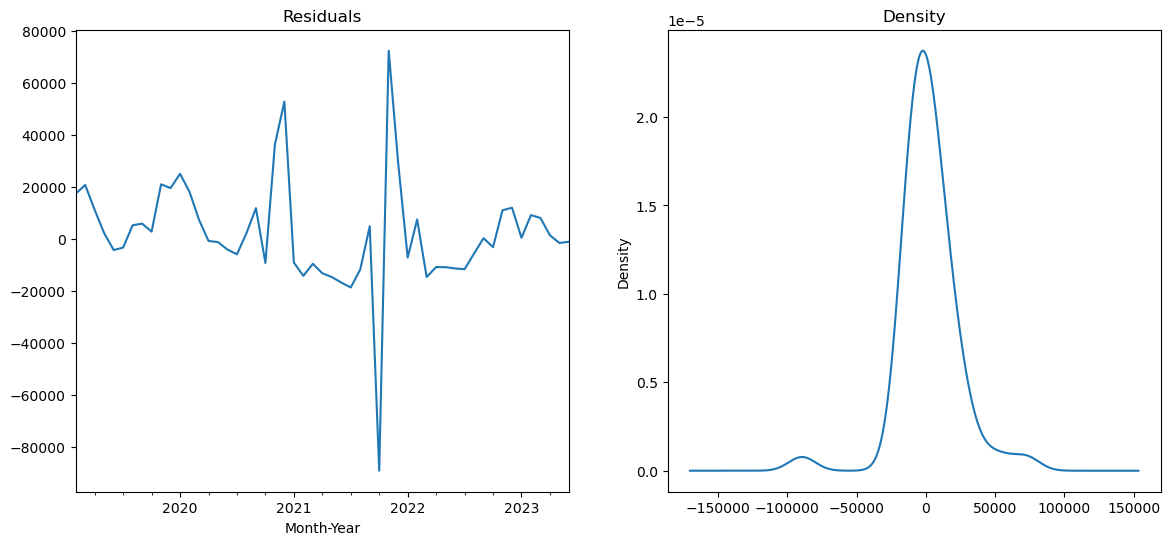

In [24]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

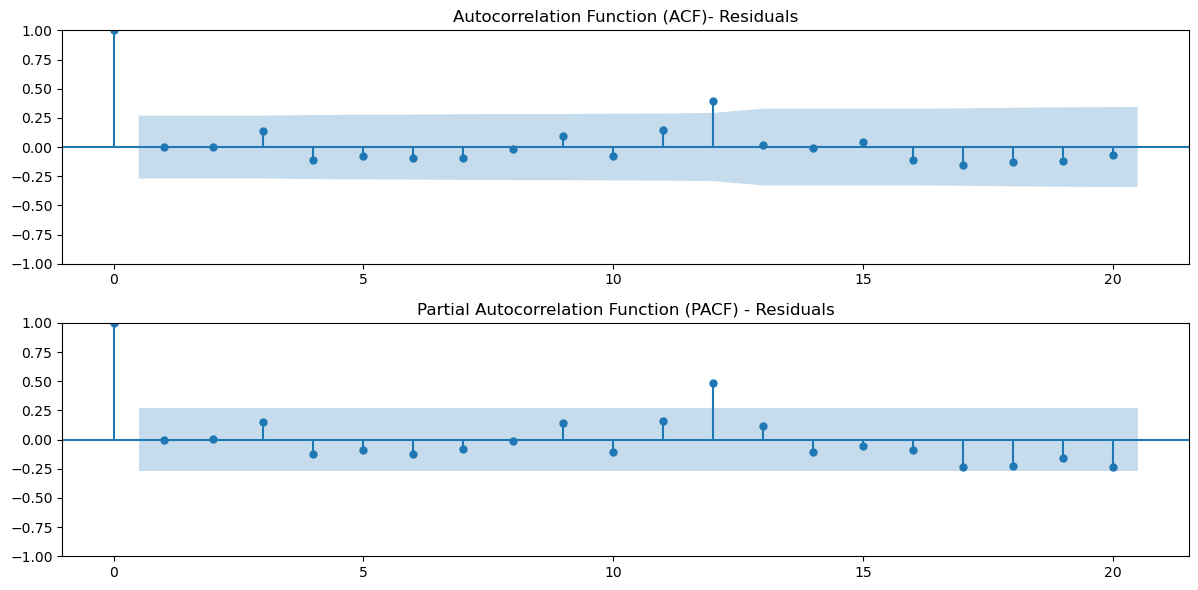

In [25]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

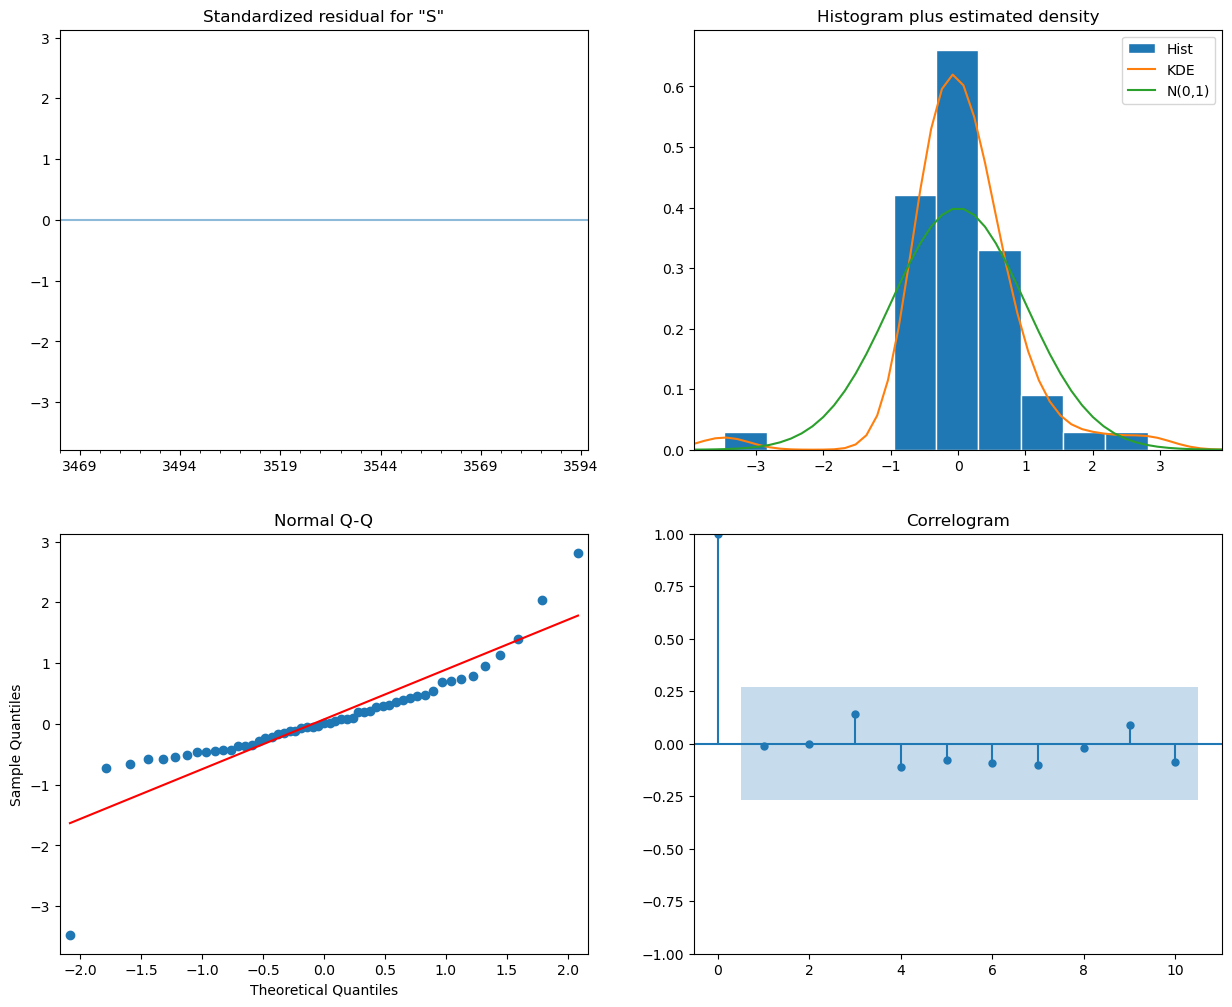

In [26]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [28]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [29]:
pred=model_arima.predict(start=len(train), end=(len(sales_e)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_e['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [30]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

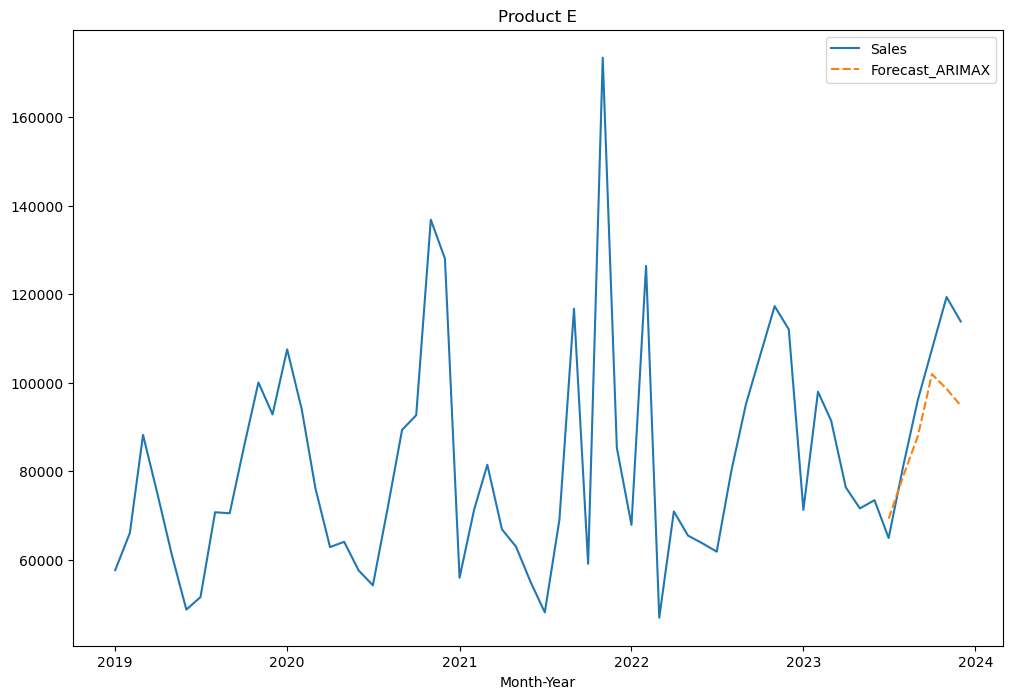

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_e[['Sales','Forecast_ARIMAX']])
plt.title('Product E')
plt.show()

In [32]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 10039.659503828087
MAPE - ARIMAX: 0.09561775445620237
MSE - ARIMAX: 152631902.5864725
RMSE - ARIMAX: 12354.42846053481


# SARIMA

In [33]:
import statsmodels.api as sm

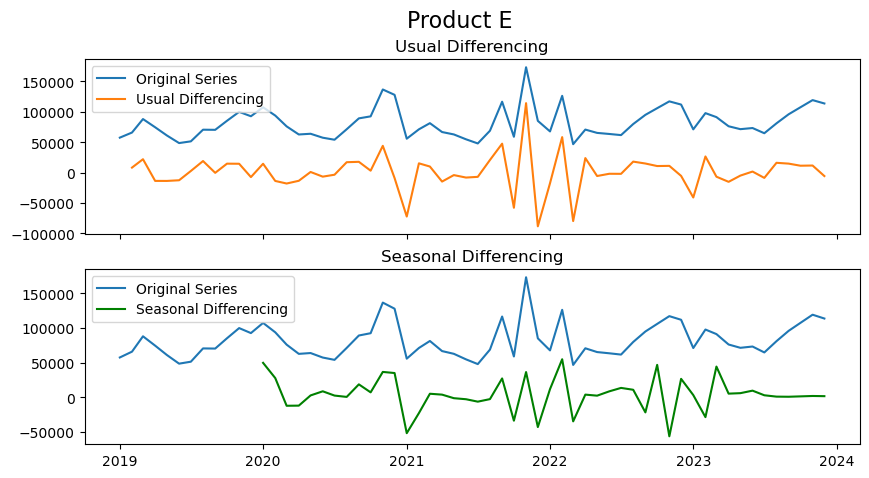

In [34]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_e['Sales'], label='Original Series')
axes[0].plot(sales_e['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_e['Sales'], label='Original Series')
axes[1].plot(sales_e['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product E', fontsize=16)
plt.show()

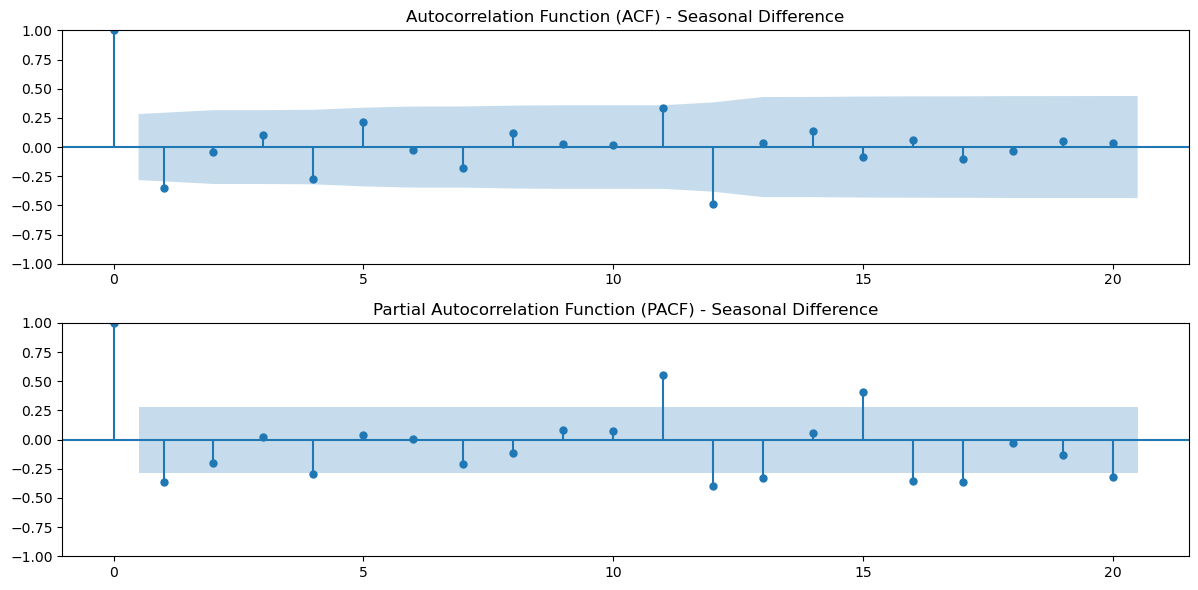

In [35]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_e['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_e['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

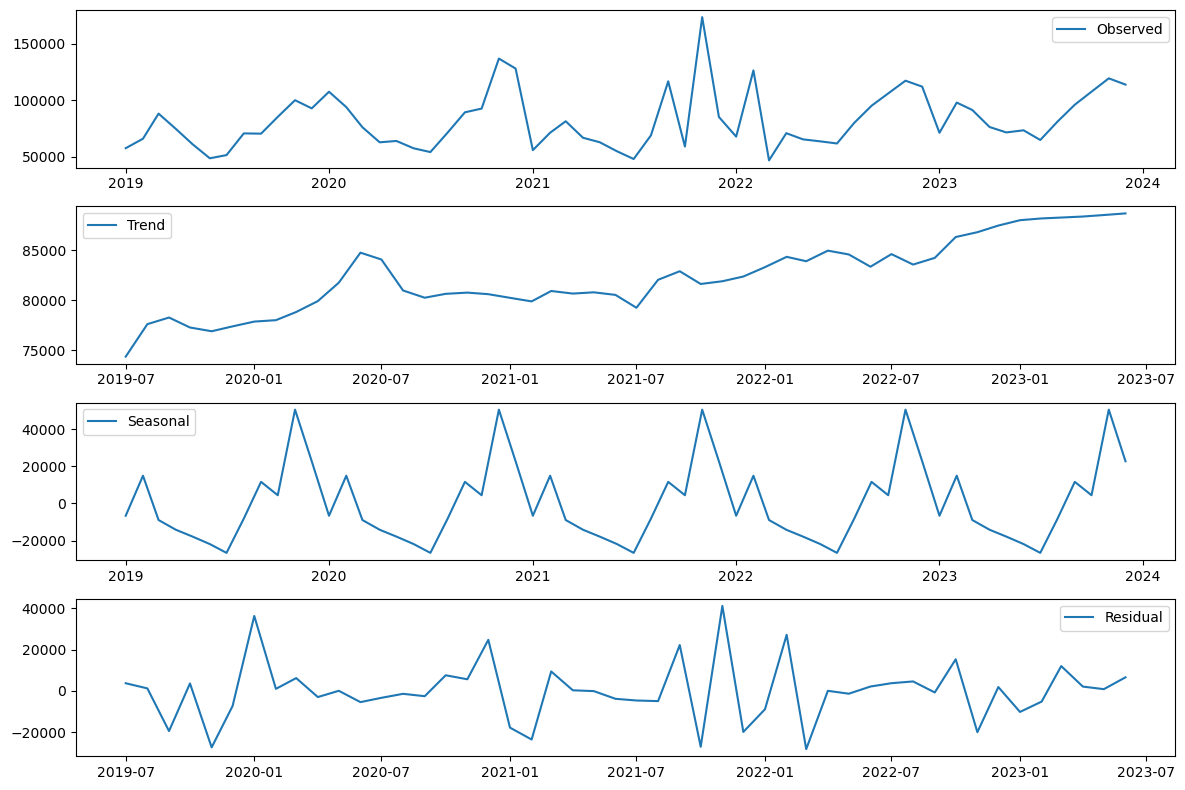

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_e['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [38]:
order_SARIMAX=[]
# Loop over P order
for P in range(5):
    # Loop over Q order
    for Q in range(3):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(1,1,1), seasonal_order=(P, 1, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [39]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q         aic         bic           mae           mse
9   3  0  953.940010  967.648586   2645.986578  1.120264e+07
1   0  1  954.115652  964.397084   7193.101057  1.411527e+08
2   0  2  955.850218  967.845222   4744.655671  6.114412e+07
12  4  0  955.940455  971.362604   2838.297110  1.271059e+07
4   1  1  955.948743  967.943748   5847.415029  9.547929e+07
10  3  1  956.069145  971.491293   1647.416381  3.545558e+06
8   2  2  957.863733  973.285882   2535.792091  8.490595e+06
5   1  2  957.868194  971.576771   4459.183019  4.935587e+07
13  4  1  957.967620  975.103341   3133.941302  1.686112e+07
6   2  0  958.085500  970.080505   6337.860783  6.693287e+07
11  3  2  958.196472  975.332193   4289.720358  4.211750e+07
3   1  0  959.615670  969.897102  14405.664049  4.970754e+08
14  4  2  960.118678  978.967971   4200.258823  3.585015e+07
0   0  0  962.887638  971.455499    868.148065  1.027611e+06
7   2  1  962.968917  976.677494  12251.319370  3.228775e+08


In [40]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1,1,1),seasonal_order=(3,1,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(3, 1, [], 12)   Log Likelihood                -468.970
Date:                             Thu, 09 May 2024   AIC                            953.940
Time:                                     17:48:51   BIC                            967.649
Sample:                                 01-01-2019   HQIC                           958.932
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.1623      0.057      2.862      0.004       0.051       0.274
Market

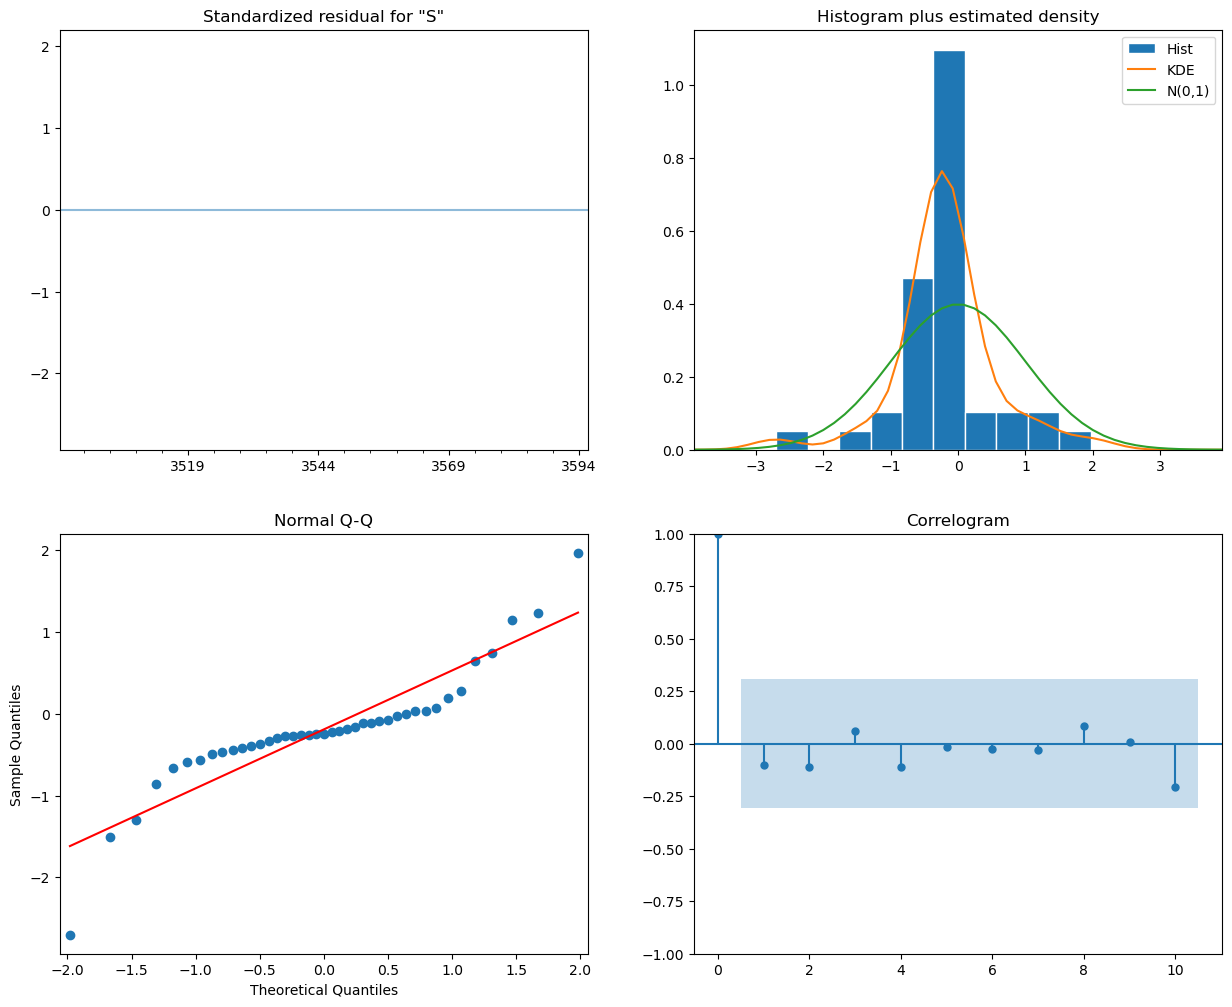

In [41]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
forecast_test_sarima=sarima_model.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [43]:
sales_e['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product E')

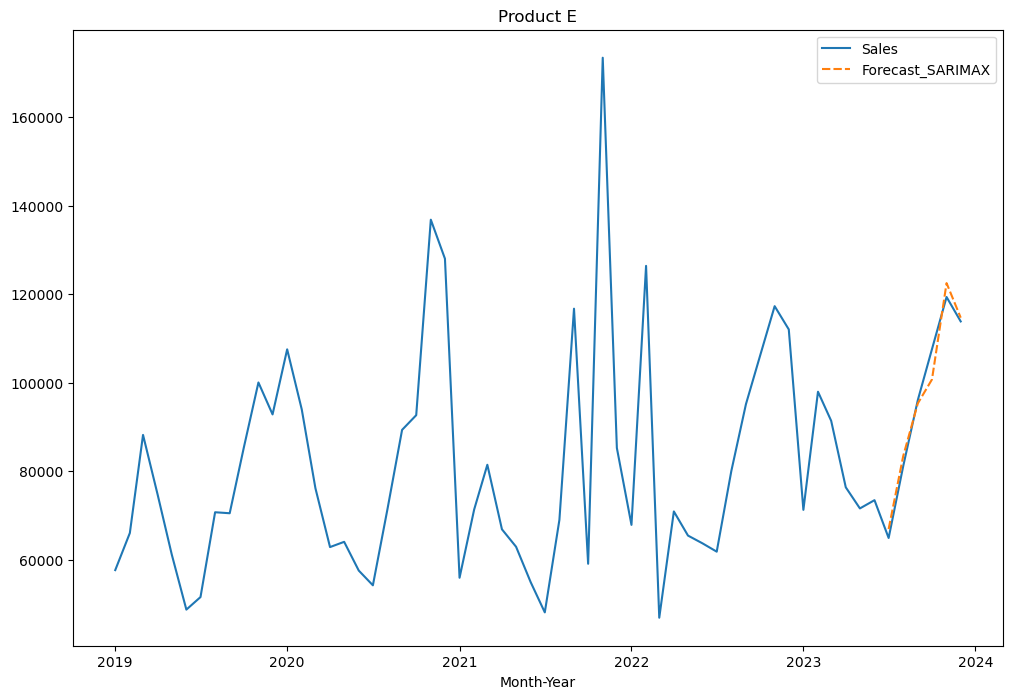

In [44]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_e[['Sales','Forecast_SARIMAX']])
plt.title('Product E')

In [45]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 2645.987
MAPE - SARIMAX: 0.027
MSE - SARIMAX: 11202635.732
RMSE - SARIMAX: 3347.034


# AUTO-ARIMA

In [46]:
import pmdarima as pm

In [47]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=6,max_q=3,
                          start_P=0, D=1, start_Q=0, max_P=6 ,max_Q=3 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=994.432, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=980.914, Time=0.14 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=983.413, Time=0.22 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=985.115, Time=1.27 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=981.137, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=985.241, Time=0.56 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=986.945, Time=3.07 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=988.958, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.57 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=987.236, Time=0.67 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=988.914, Time=5.57 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=inf, Time=4.62 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=10.14 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=989.137, Time=5.15 sec
 ARIMA(0,1,0)(4,1,0)[12] 

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [48]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   54
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -477.351
Date:                            Thu, 09 May 2024   AIC                            964.702
Time:                                    17:52:07   BIC                            973.270
Sample:                                01-01-2019   HQIC                           967.822
                                     - 06-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2128      0.436     -2.781      0.005      -2.068      -0.358
ar.L2         -0.5730      0.210     -2.725      0.006      -0.985      -0.161
ma.L1          0.5891      0.498      1.183      0.237      -0.387       1.565
ma.S.L12      -0.6280      0.218     -2.886      0.004      -1.055      -0.201
sigma2      7.616e+08   3.12e-10   2.44e+18      0.000    7.62e+08    7.62e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 6.40
Prob(Q):                              0.67   Prob(JB):                         0.04
Heteroskedasticity (H):               0.21   Skew:                            -0.63
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.57e+34. Standard errors may be unstable.
"""

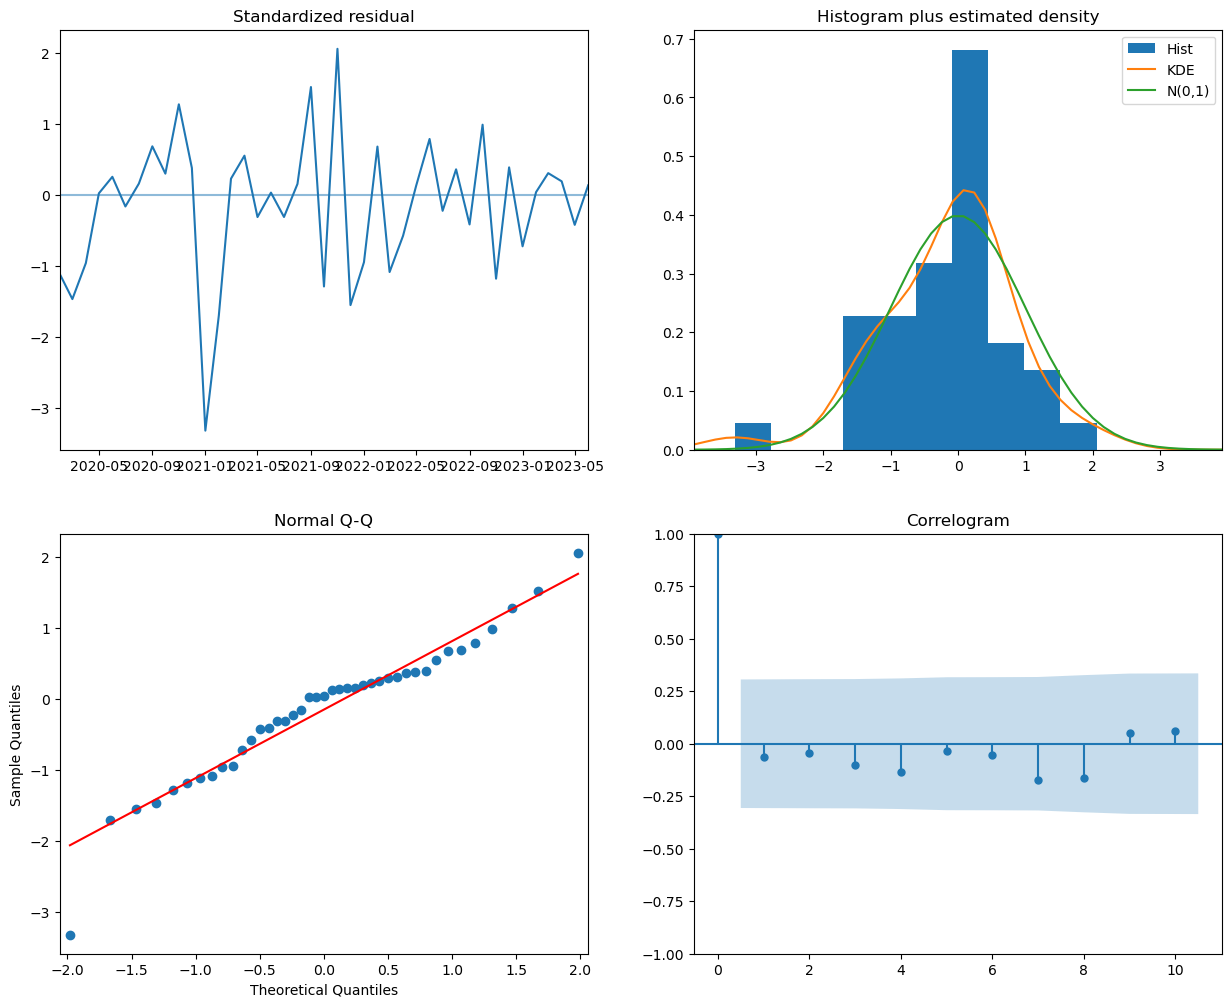

In [50]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [51]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_e['Forecast_AUTO ARIMA']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product E')

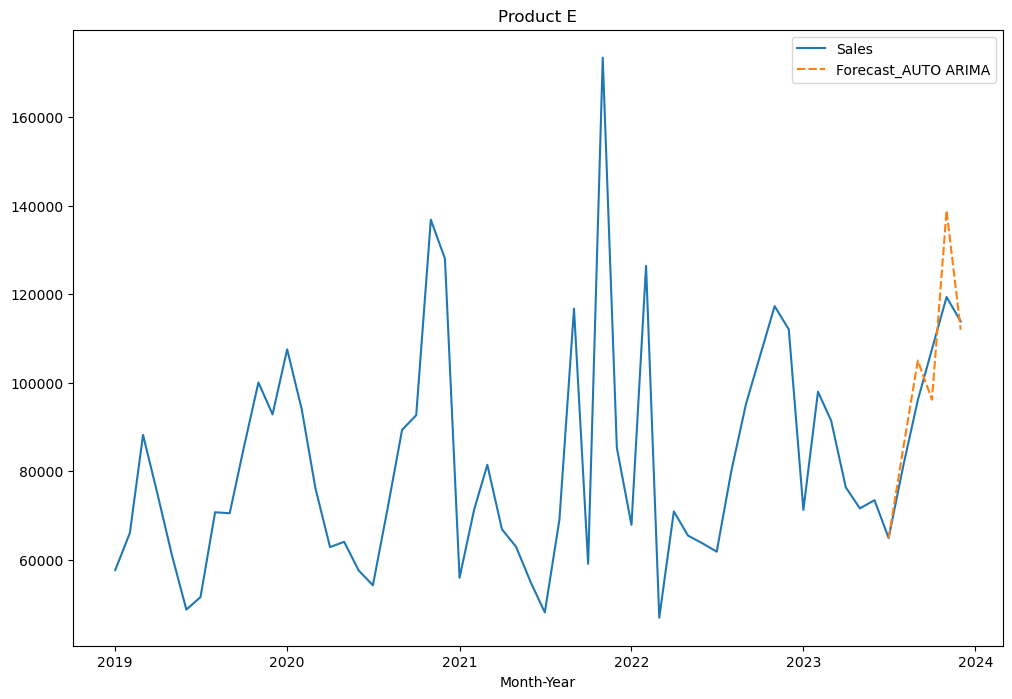

In [52]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_e[['Sales','Forecast_AUTO ARIMA']])
plt.title('Product E')

In [53]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 7644.731933646185
MAPE - AUTO ARIMAX: 0.07166220284731607
MSE - AUTO ARIMAX: 101977596.4388467
RMSE - AUTO ARIMAX: 10098.395735900169


In [54]:
sales_e.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMA
Month-Year,,,,,,
2023-01-01,71268,317822,1332763,NaN,NaN,NaN
2023-02-01,97965,436878,1832017,NaN,NaN,NaN
2023-03-01,91393,407570,1709115,NaN,NaN,NaN
2023-04-01,76364,340548,1428062,NaN,NaN,NaN
2023-05-01,71591,319262,1338804,NaN,NaN,NaN
2023-06-01,73457,327584,1373699,NaN,NaN,NaN
2023-07-01,64909,289464,1213845,69265.843242,66933.738921,64834.318356
2023-08-01,81175,362003,1518031,78901.758533,83440.707449,85200.373639
2023-09-01,96096,428543,1797065,87917.778575,95338.006082,105013.853842


In [55]:
sales_e.mean()

Sales                  8.209883e+04
Market Size            3.769448e+05
Marketing Expense      1.633066e+06
Forecast_ARIMAX        8.857762e+04
Forecast_SARIMAX       9.727703e+04
Forecast_AUTO ARIMA    1.003529e+05
dtype: float64

In [56]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,10039.659504,0.095618,1.526319e+08,12354.428461
AUTO ARIMAX,7644.731934,0.071662,1.019776e+08,10098.395736
SEASONAL ARIMAX,2645.986578,0.027387,1.120264e+07,3347.033871


# TESTING

In [20]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=6,max_q=2,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=977.177, Time=0.06 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=978.387, Time=0.13 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=979.051, Time=0.36 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=978.613, Time=0.11 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=979.552, Time=0.42 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=978.276, Time=1.56 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=979.518, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=980.931, Time=0.25 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=980.156, Time=0.65 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=981.102, Time=0.23 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,0,1)(2,1,0)[12] inter

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [21]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   54
Model:             SARIMAX(2, 0, 2)x(0, 1, [], 12)   Log Likelihood                -481.835
Date:                             Wed, 08 May 2024   AIC                            975.669
Time:                                     19:27:52   BIC                            986.095
Sample:                                 01-01-2019   HQIC                           979.491
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5837.2072   1.14e+04      0.511      0.610   -1.66e+04    2.82e+04
ar.L1         -1.2658      0.136     -9.286      0.000      -1.533      -0.999
ar.L2         -0.9662      0.148     -6.515      0.000      -1.257      -0.676
ma.L1          1.1077      0.195      5.678      0.000       0.725       1.490
ma.L2          0.9038      0.202      4.481      0.000       0.508       1.299
sigma2        5.5e+08      0.183      3e+09      0.000     5.5e+08     5.5e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.40   Prob(JB):                         0.93
Heteroskedasticity (H):               0.39   Skew:                            -0.01
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.34e+25. Standard errors may be unstable.
"""

In [22]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_e['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product E')

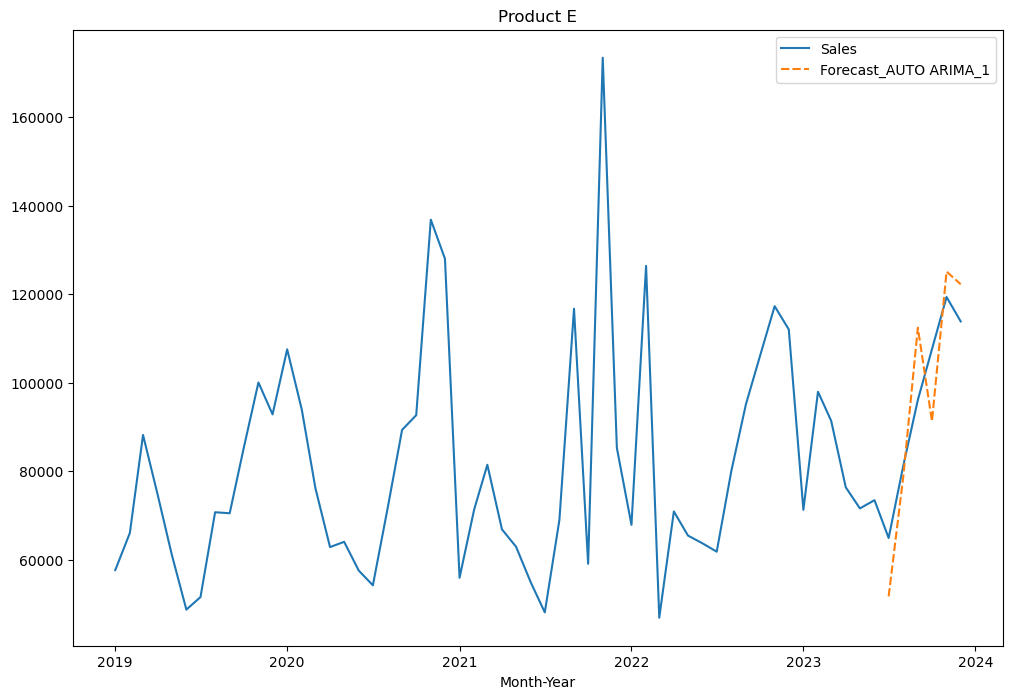

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_e[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product E')

In [24]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 10406.213401087998
MAPE - AUTO ARIMA: 0.11285157780120926
MSE - AUTO ARIMA: 135990092.82854202
RMSE - AUTO ARIMA: 11661.479015482642
